# CS412 - Machine Learning - 2021
## Homework 3
100 pts


## Goal

The goal of this homework is two-fold:

*   Introduction to the Transfer Learning
*   Gain experience with three dimensional input data (colored images), and pretrained models

## Dataset
[**CelebA**](https://www.cs.toronto.edu/~kriz/cifar.html) is a large-scale face attributes dataset with more than 200K celebrity images, each with 40 attribute annotations. The images in this dataset cover large pose variations and background clutter.

**Download the data from Sucourse and upload it to your Google drive. In your Google drive, you need to have CelebA10k.zip and CelebA10kGender.txt uploaded. (Do not change the name of these files.) Reserve 20% of the training data for validation** and **use the rest for development (learning your models). The official test data (2000 samples) should only be used for testing at the end, and not model selection.**

## Task 
Build a classifier with the Keras library function calls and pretrained models to classify gender in the CelebA dataset.

## Software: 

Keras is a library that we will use especially for deep learning, but also with basic neural network functionality of course.

You may find the necessary function references here: 

http://scikit-learn.org/stable/supervised_learning.html

https://keras.io/api/

https://keras.io/api/applications/

When you search for Conv2d for instance, you should find the relevant function and explained parameters, easily.

## Submission: 
Fill this notebook. Write the report section at the end, removing the part in italics. 

You should prepare a separate pdf document as your homework (name hw3-CS412-yourname.pdf) which consists of the report (Part 8) of the notebook for easy viewing -and- include a link to your notebook from within the pdf report (make sure to include the link obtained from the #share link on top right). 

##1) Initialize

*   First make a copy of the notebook given to you as a starter.

*   Make sure you choose Connect form upper right.


## 2) Load training dataset

*  Read from Keras library.



In [ ]:
# load data
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
# import the necessary libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

import keras
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
% matplotlib inline

In [ ]:
#This will take around 2 to 4 minutes, depends on the internet
import zipfile
zip_ref = zipfile.ZipFile('/content/drive/My Drive/cs412-hw3/CelebA10k.zip', 'r') # enter the file path on your drive
zip_ref.extractall()
zip_ref.close()

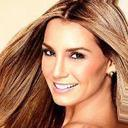

In [ ]:
from IPython.display import Image
Image('000001.jpg')

In [ ]:
data = pd.read_csv("/content/drive/My Drive/cs412-hw3/CelebA10klabels.csv") # enter the file path on your drive
print(data.shape)
data.head()

(10000, 2)


,5_o_Clock_Shadow,Male
0,000001.jpg,1
1,000002.jpg,1
2,000003.jpg,-1
3,000004.jpg,-1
4,000005.jpg,-1


In [ ]:
data=pd.get_dummies(data=data,columns=['Male'])
data=data.rename(columns={"Male_1":"Male","Male_-1":"Female"})
data.head()

,5_o_Clock_Shadow,Female,Male
0,000001.jpg,0,1
1,000002.jpg,0,1
2,000003.jpg,1,0
3,000004.jpg,1,0
4,000005.jpg,1,0


In [ ]:
### DO NOT CHANGE THE CODE HERE SO AS TO NOT GET ERRORS
# parameters
ImgSz = 64

# Read training images from text file

labels = []
images = []
for j in range(data.shape[0]):
    labels.append([data["Male"][j],data["Female"][j]])
    #Reading Image
    im = image.load_img(data["5_o_Clock_Shadow"][j])  
    im = im.resize((ImgSz, ImgSz))
    x = image.img_to_array(im) 
    #x = x.reshape((1,) + x.shape) 
    x = np.array(x, dtype="float") / 255.0
    images.append(x)
    
lbls = np.array(labels)
imgs = np.array(images)

x_train = imgs[0:8000]
y_train = lbls[0:8000]
x_test = imgs[8000:]
y_test = lbls[8000:]

In [ ]:
len(imgs)

10000

In [ ]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((8000, 64, 64, 3), (8000, 2), (2000, 64, 64, 3), (2000, 2))

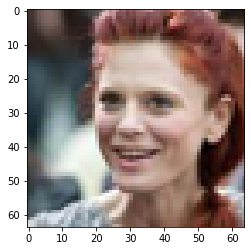

In [ ]:
plt.imshow(x_train[1])

##3) Visualizing/Understanding the dataset

- Display five random images together with their labels

- Display statistics about the dataset, such as its memory usage, distribution of labels, etc.


In [ ]:
import random

In [ ]:
lbls

array([[1, 0],
       [1, 0],
       [0, 1],
       ...,
       [0, 1],
       [1, 0],
       [1, 0]], dtype=uint8)

In [ ]:
males=0
females=0
size=len(lbls)
for i in range(size-1):
  if lbls[i][0]==1:
    females=females+1
  elif lbls[i][1]==1:
    males=males+1
print("the amount of males: ", males, ", the amount of females: ",females)

the amount of males:  5477 , the amount of females:  4522


In [ ]:
data.describe()

,Female,Male
count,10000.000000,10000.000000
mean,0.547700,0.452300
std,0.497744,0.497744
min,0.000000,0.000000
25%,0.000000,0.000000
50%,1.000000,0.000000
75%,1.000000,1.000000
max,1.000000,1.000000


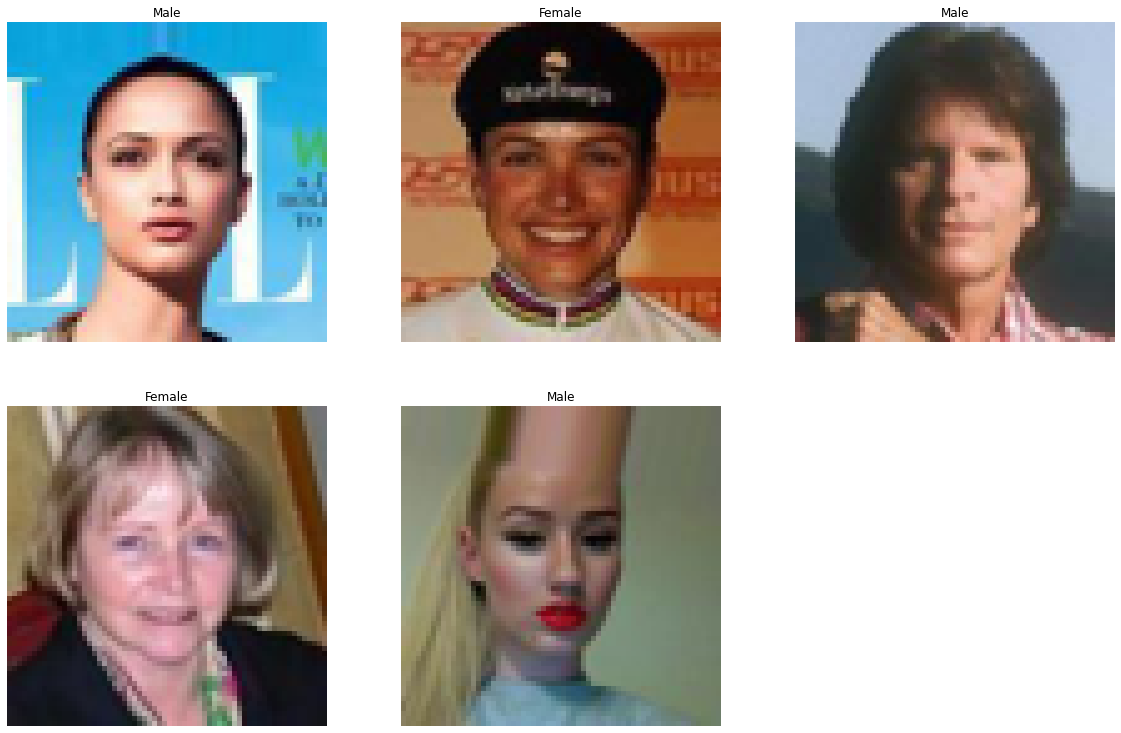

In [ ]:
def printResults(lbls):
  if lbls[0]==1:
     plt.title("Female")
  else:
    plt.title("Male")

def plotImagesRandom5():
    n1 = random.randint(0,len(imgs))
    n2 = random.randint(0,len(imgs))
    n3 = random.randint(0,len(imgs))
    n4 = random.randint(0,len(imgs))
    n5 = random.randint(0,len(imgs))
    plt.figure(figsize=(20,20))
    plt.subplot(331)
    plt.imshow(imgs[n1]); plt.axis('off')
    printResults(lbls[n1])

    plt.subplot(332)
    plt.imshow(imgs[n2]); plt.axis('off')
    printResults(lbls[n2])

    plt.subplot(333)
    plt.imshow(imgs[n3]); plt.axis('off')
    printResults(lbls[n3])

    plt.subplot(334)
    plt.imshow(imgs[n4]); plt.axis('off')
    printResults(lbls[n4])

    plt.subplot(335)
    plt.imshow(imgs[n5]); plt.axis('off')
    printResults(lbls[n5])
plotImagesRandom5()

In [ ]:
# Split 80-20
from sklearn.model_selection import train_test_split
xtrain,xvalid,ytrain,yvalid=train_test_split(x_train,y_train,train_size=0.8,random_state=42)  #seperate validation and training
print(xtrain.shape,xvalid.shape,ytrain.shape,yvalid.shape)

(6400, 64, 64, 3) (1600, 64, 64, 3) (6400, 2) (1600, 2)


## 5) Train Model with Transfer Learning
* Import a pretrained model from keras. By freezing some of its layer weights and/or adding more layers to its output train the model on the dataset. Metaparameters of the model are to be set to default or your own choice. 

* Train two more models by adding at most 5 hidden layers into a pretrained model of your choice. Choose the best model among all the models you trained so far by reporting their performance, together with their runtimes, number parameters, etc.



VGG16


In [ ]:
import keras
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from keras.layers import Input, Flatten, Dense
from keras.models import Model, load_model

In [ ]:
model_vgg_conv = VGG16(weights='imagenet', include_top=False, input_shape=(64,64,3))
model_vgg_conv.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0     

In [ ]:
# Make vgg16 model layers as non trainable
# freeze the weights of all of the layers
for layer in model_vgg_conv.layers:
   layer.trainable = False
    
model_vgg_conv.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0     

In [ ]:
from tensorflow.keras.optimizers import Adam

img_shape = xtrain.shape[1:]
print(img_shape)
num_classes = 2
keras_input = Input(shape=img_shape, name = 'image_input')

#Use the generated model
output_vgg_conv = model_vgg_conv(keras_input)

(64, 64, 3)


In [ ]:
# Add 3 fully-connected layers 0.001
My_vgg = Flatten(name='flatten')(output_vgg_conv)
My_vgg = Dense(128, activation='relu', name='fc1')(My_vgg)
My_vgg = Dense(64, activation='relu', name='fc2')(My_vgg)
My_vgg = Dense(num_classes, activation='softmax', name='predictions')(My_vgg)

#Create your own model 
pretrained_model = Model(inputs=keras_input, outputs=My_vgg)
adam_001 = Adam(learning_rate=0.001)
pretrained_model.compile(loss='categorical_crossentropy', optimizer=adam_001, metrics=['accuracy'])

# Train the model using own data
history = pretrained_model.fit(xtrain, ytrain,batch_size=32, epochs=5,validation_data=(xvalid,yvalid))

# Evaluate the model on validation set
score = pretrained_model.evaluate(xvalid, yvalid)
print("Accuracy on validation set: ", score[1])

Epoch 1/5
200/200 [==============================] - 10s 43ms/step - loss: 0.6397 - accuracy: 0.6452 - val_loss: 0.6306 - val_accuracy: 0.6531
Epoch 2/5
200/200 [==============================] - 9s 46ms/step - loss: 0.5810 - accuracy: 0.6973 - val_loss: 0.5951 - val_accuracy: 0.6862
Epoch 3/5
200/200 [==============================] - 8s 40ms/step - loss: 0.5584 - accuracy: 0.7100 - val_loss: 0.6028 - val_accuracy: 0.6837
Epoch 4/5
200/200 [==============================] - 9s 46ms/step - loss: 0.5391 - accuracy: 0.7247 - val_loss: 0.5880 - val_accuracy: 0.6950
Epoch 5/5
50/50 [==============================] - 2s 33ms/step - loss: 0.5798 - accuracy: 0.6969
Accuracy on validation set:  0.6968749761581421


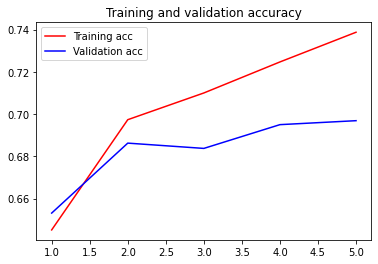

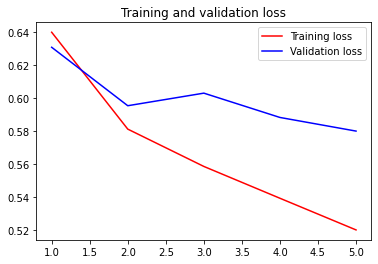

In [ ]:
# plot the loss and accuracy
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.title('Training and validation accuracy')
plt.plot(epochs, acc, 'red', label='Training acc')
plt.plot(epochs, val_acc, 'blue', label='Validation acc')
plt.legend()

plt.figure()
plt.title('Training and validation loss')
plt.plot(epochs, loss, 'red', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')

plt.legend()

plt.show()

In [ ]:
#5 layers
My_vgg2 = Flatten(name='flatten')(output_vgg_conv)
My_vgg2 = Dense(256, activation='relu', name='fc1')(My_vgg2)
My_vgg2 = Dense(128, activation='relu', name='fc2')(My_vgg2)
My_vgg2 = Dense(64, activation='relu', name='fc3')(My_vgg2)
My_vgg2 = Dense(32, activation='relu', name='fc4')(My_vgg2)
My_vgg2 = Dense(num_classes, activation='softmax', name='predictions')(My_vgg2)

#Create your own model 
pretrained_model2 = Model(inputs=keras_input, outputs=My_vgg2)
adam_001 = Adam(learning_rate=0.001)
pretrained_model2.compile(loss='categorical_crossentropy', optimizer=adam_001, metrics=['accuracy'])

# Train the model using own data
history2 = pretrained_model2.fit(xtrain, ytrain,batch_size=32, epochs=5,validation_data=(xvalid,yvalid))

# Evaluate the model on validation set
score2 = pretrained_model2.evaluate(xvalid, yvalid)
print("Accuracy on train set 5 additional layer VGG16: ", score2[1])


Epoch 1/5
200/200 [==============================] - 10s 44ms/step - loss: 0.6262 - accuracy: 0.6527 - val_loss: 0.6211 - val_accuracy: 0.6531
Epoch 2/5
200/200 [==============================] - 9s 43ms/step - loss: 0.5817 - accuracy: 0.6936 - val_loss: 0.5800 - val_accuracy: 0.7025
Epoch 3/5
200/200 [==============================] - 9s 47ms/step - loss: 0.5562 - accuracy: 0.7127 - val_loss: 0.5774 - val_accuracy: 0.6994
Epoch 4/5
200/200 [==============================] - 10s 48ms/step - loss: 0.5315 - accuracy: 0.7323 - val_loss: 0.5978 - val_accuracy: 0.6819
Epoch 5/5
50/50 [==============================] - 2s 35ms/step - loss: 0.5779 - accuracy: 0.7019
Accuracy on train set 5 additional layer VGG16:  0.7018749713897705


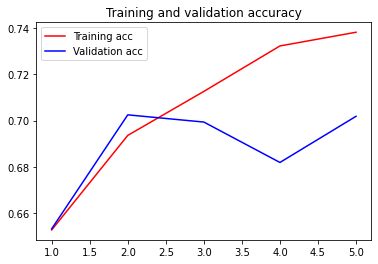

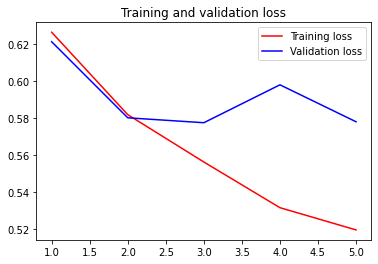

In [ ]:
# plot the loss and accuracy
import matplotlib.pyplot as plt
%matplotlib inline

acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']
loss = history2.history['loss']
val_loss = history2.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.title('Training and validation accuracy')
plt.plot(epochs, acc, 'red', label='Training acc')
plt.plot(epochs, val_acc, 'blue', label='Validation acc')
plt.legend()

plt.figure()
plt.title('Training and validation loss')
plt.plot(epochs, loss, 'red', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')

plt.legend()

plt.show()

RESNET50

In [ ]:
import keras
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input
from keras.layers import Input, Flatten, Dense
from keras.models import Model, load_model

In [ ]:
model_resnet_conv = ResNet50(weights='imagenet', include_top=False,input_shape=(64,64,3))
model_resnet_conv.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_14 (InputLayer)          [(None, 64, 64, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 70, 70, 3)    0           ['input_14[0][0]']               
                                                                                                  
 conv1_conv (Conv2D)            (None, 32, 32, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 32, 32, 64)   256         ['conv1_conv[0][0]']             
                                                                                           

In [ ]:
# Make resnet-50 model layers as non trainable
for layer in model_resnet_conv.layers:
   layer.trainable = False
    
model_resnet_conv.summary()    

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_14 (InputLayer)          [(None, 64, 64, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 70, 70, 3)    0           ['input_14[0][0]']               
                                                                                                  
 conv1_conv (Conv2D)            (None, 32, 32, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 32, 32, 64)   256         ['conv1_conv[0][0]']             
                                                                                           

In [ ]:
from keras.layers import Dropout
img_shape = xtrain.shape[1:]

#Create your own input format
keras_input = Input(shape=img_shape, name = 'image_input')

#Use the generated model 
output_resnet_conv = model_resnet_conv(keras_input)

# Add the fully-connected layers 
My_resnet2 = Flatten(name='flatten')(output_resnet_conv)
My_resnet2 = Dense(256, activation='relu', name='fc1')(My_resnet2)
My_resnet2 = Dense(128, activation='relu', name='fc2')(My_resnet2)
My_resnet2 = Dense(64, activation='relu', name='fc3')(My_resnet2)
My_resnet2 = Dense(32, activation='relu', name='fc4')(My_resnet2)
My_resnet2 = Dense(num_classes, activation='softmax', name='predictions')(My_resnet2)

#Create your own model 
pretrained_model3 = Model(inputs=keras_input, outputs=My_resnet2)
adam_001 = Adam(learning_rate=0.001)
pretrained_model3.compile(loss='categorical_crossentropy', optimizer=adam_001, metrics=['accuracy'])

# Train the model
history3 = pretrained_model3.fit(xtrain, ytrain, batch_size=32, epochs=5,validation_data=(xvalid,yvalid))

# Evaluate the model
score = pretrained_model3.evaluate(xvalid, yvalid)
print("Accuracy on train set 5 additional layer -resnet50 : ", score[1])

Epoch 1/5
200/200 [==============================] - 15s 56ms/step - loss: 0.6782 - accuracy: 0.5753 - val_loss: 0.6981 - val_accuracy: 0.5269
Epoch 2/5
200/200 [==============================] - 11s 54ms/step - loss: 0.6485 - accuracy: 0.6220 - val_loss: 0.6260 - val_accuracy: 0.6550
Epoch 3/5
200/200 [==============================] - 11s 53ms/step - loss: 0.6317 - accuracy: 0.6461 - val_loss: 0.6345 - val_accuracy: 0.6394
Epoch 4/5
200/200 [==============================] - 10s 49ms/step - loss: 0.6312 - accuracy: 0.6484 - val_loss: 0.6342 - val_accuracy: 0.6400
Epoch 5/5
50/50 [==============================] - 2s 38ms/step - loss: 0.6237 - accuracy: 0.6744
Accuracy on train set 5 additional layer -resnet50 :  0.6743749976158142


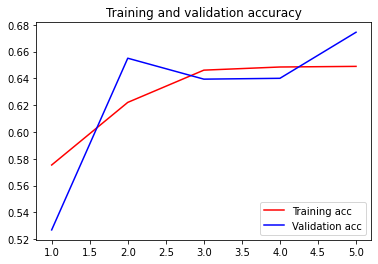

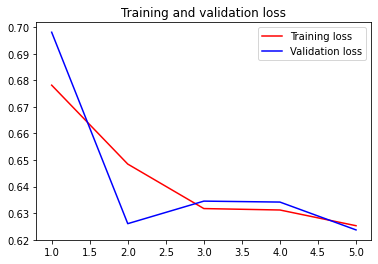

In [ ]:
# plot the loss and accuracy
import matplotlib.pyplot as plt
%matplotlib inline

acc = history3.history['accuracy']
val_acc = history3.history['val_accuracy']
loss = history3.history['loss']
val_loss = history3.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.title('Training and validation accuracy')
plt.plot(epochs, acc, 'red', label='Training acc')
plt.plot(epochs, val_acc, 'blue', label='Validation acc')
plt.legend()

plt.figure()
plt.title('Training and validation loss')
plt.plot(epochs, loss, 'red', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')

plt.legend()

plt.show()

## 6) Test your classifier on Test set

- Apply same pre-processing as training data
- Predict the labels of testing data **using the best model that you have selected according to your validation results** and report the accuracy. 

In [ ]:
from sklearn.metrics import accuracy_score
# Load test data
#the best one on train set is VGG16 with 5 additional layers
# Predict
ypred_test_model=pretrained_model2.predict(x_test)
#print("Accuracy score on test set: ",accuracy_score(y_test, ypred_test_model))


In [ ]:
ypred_test_model

array([[0.5287715 , 0.47122848],
       [0.25754175, 0.7424582 ],
       [0.6678215 , 0.33217847],
       ...,
       [0.9341768 , 0.06582316],
       [0.29317632, 0.70682365],
       [0.9924784 , 0.00752165]], dtype=float32)

In [ ]:
for i in range(0,len(ypred_test_model)):
  if ypred_test_model[i][0]<=ypred_test_model[i][1]:
     ypred_test_model[i][0]=0
     ypred_test_model[i][1]=1
  else:
     ypred_test_model[i][0]=1
     ypred_test_model[i][1]=0

In [ ]:
print("Accuracy score on test set: ",accuracy_score(y_test, ypred_test_model))

Accuracy score on test set:  0.664


##7) Report Your Results

**Notebook should be RUN:** As training and testing may take a long time, we may just look at your notebook results; so make sure **each cell is run**, so outputs are there.

**Report:** Write an **one page summary** of your approach to this problem **below**; this should be like an abstract of a paper or the executive summary (you aim for clarity and passing on information, not going to details about known facts such as what CNN is or what transfer learning is, assuming they are known to people in your research area). 

**Must include statements such as those below:**
**(Remove the text in bullet points, below, and include your own report)**

  In this homework, we aimed to classify the people that are in images as female and male by using transfer learning techniques. In this part, I used VGG16 and ResNet50 as models.  

  Before the implementation, I modified the dataset in order to have two seperate columns as male and female. This can be done in two ways; get_dummies and to_categorical. Since we used get_dummies in previous homeworks, I preferred to use that. In the dataset, there are 5477 males and 4522 females. As it is requested, I printed 5 random pictures and their corresponding titles from the dataset by using random.randint(). After that, the training set is splitted as 80% training and 20% validation. For this, train_test_split() is used.

  In the implementation, I used firsly vgg16. Since we are applying fine tuning, the last layer should not be included in the model. For that, include_top is equalise to false. And the weights of all layers are freezed. In the first model I have chosen to implement three layers with 0.001 learning rate. I have chosen learning rate as 0.001 since smaller learning rate gives better results compared to higher ones. In the case of high learning rates, it can skip the optimal point since step size is larger with high learning rates. I took 5 as epoch, 32 as batch_size. In the layers I decrease the number of nodes towards to the final output layer. Since I changed the data frame from “male” to “male” and “female”, number of output nodes become 2. 

  VGG 16 is the convolutional neural network architecture that is formed with the arrangement of convolution and max pool layers consistently. It consists of 16 convolutional layers and 3 fully connected layer at the end. The filters are used with a small receptive field :3x3. Since our problem is a classification problem, the last layer must be softmax. The dataset that is used in the implementation is ImageNet has 15 million labeled images for approximately 22000 categories.

  Resnet is the short version for Residual Network. ResNet50 uses 50 neural network layers. This architecture has “skip connections” approach. This fact makes it has lower complexity than VGG16. Skip connections means that it skips some layer and feeds the output of one layer as the input to next layers.
I implemented ResNet and VGG16 with 5 additional layer (same node numbers).

The accuracy results of the models on training set:

model  | Accuracy on training
-------------------|-------------------
VGG16 with 3 layers learning rate 0.001| 0.6968
VGG16 with 5 layers learning rate 0.001 | 0.7018
ResNet50 with 5 layers learning rate 0.001 | 0.6743

  The best one is found as VGG16 with 5 layers learning rate 0.001 with 0.7018 accuracy on training set. This is expected since more number layers enable more learning. I implemented this to test set. Since the prediction results came as fractional values, I converted them 0 and 1’s appropriately (The higher value is equalized to 1, other 0.) The accuracy on test set with the best model comes as 0.664. 

  You can see the charts belong to the models that are used in train/validation step above.


 



##8) (Bonus 5 pts) Train Convolutional neural networks first on development data


* Train a convolutional neural network from scratch (not transfer learning) with number of hidden layers and neurons of **your choice**. Rest of the parameters are to be set to default or your own choice. 

* The aim of this part is to establish an insight for convolutional neural networks and to see why we use them.


In [ ]:
# Train CNNs


# Report your results    

In [ ]:
# ### example loading a pretrained model
# #Loading the model
# VGGmodel = tf.keras.applications.VGG16(include_top = False, weights = "imagenet", input_shape = (ImgSz,ImgSz,3)) # pretrained weigths on imagenet dataset
# VGGmodel.summary() # Print the network

# # Remove last two layers (one hidden layer + Output layer)
# VGGmodel.layers.pop()
# VGGmodel.layers.pop()

# # Freeze the layers except the last 2 layers
# for layer in VGGmodel.layers[:-2]:
#     layer.trainable = False
  
# # Check the status of the layers 
# for layer in VGGmodel.layers:
#     print(layer, layer.trainable)

In [ ]:
# # Create the model
# from keras.layers import Dense, Dropout, Flatten
# model = tf.keras.Sequential() # your model that will use the pretrained model's parameters
 
# # Add the vgg convolutional base model
# model.add(VGGmodel)
 
# # Add new layers
# model.add(Flatten())
# model.add(Dense(4096, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(1, activation='sigmoid'))
 
# # Show a summary of the model. Check the number of trainable parameters
# model.summary()